In [41]:
# Install TensorFlow 1.15.0.
!pip install tensorflow==2.12.0
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
distutils: /basksir/vhome/mmakiela/.local/lib/python3.9/site-packages
sysconfig: /basksir/vhome/mmakiela/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [158]:
# hiragana

from tensorflow import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

dataset = np.load("hiragana_dataset.npz")

images = dataset['images']
labels = dataset['labels']

print(f"Images shape: {images.shape}")  # e.g., (num_samples, 48, 48)
print(f"Labels shape: {labels.shape}")  

Images shape: (33600, 63, 64)
Labels shape: (33600,)


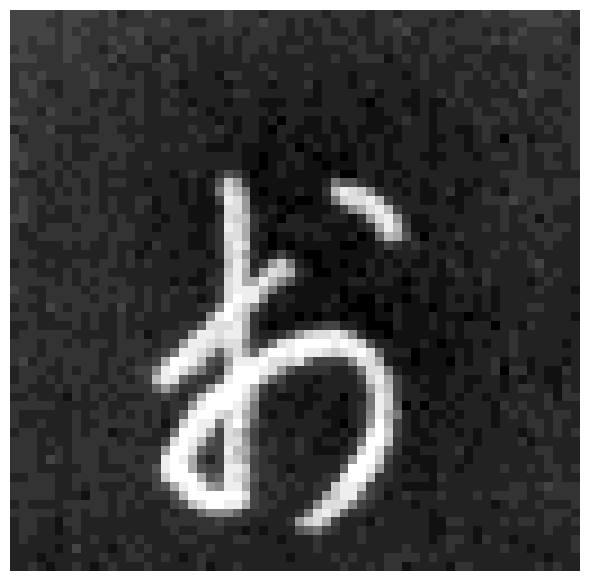

In [164]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

j = 103
ax.imshow(train_images[j], cmap='gray')
# ax.set_xticks(range(0, train_images[j].shape[1], 8)) 
# ax.set_yticks(range(0, train_images[j].shape[0], 8)) 
# ax.set_title(f"Label: {train_labels[j]}", fontsize=12)
ax.axis('off')

plt.tight_layout()
plt.savefig("hiragana_o_handwritten.png") 
plt.show()

In [129]:
from sklearn.model_selection import train_test_split

images = images / 255.0

train_images, validation_images, train_labels, validation_labels = train_test_split(
    images, labels, test_size=0.3, random_state=42
)

test_images, validation_images, test_labels, validation_labels = train_test_split(
    validation_images, validation_labels, test_size=0.5, random_state=42
)

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")
print(f"Validation images shape: {validation_images.shape}")
print(f"validation labels shape: {validation_labels.shape}")

Training images shape: (23520, 63, 64)
Training labels shape: (23520,)
Testing images shape: (5040, 63, 64)
Testing labels shape: (5040,)
Validation images shape: (5040, 63, 64)
validation labels shape: (5040,)


In [130]:
train_images = train_images.reshape(-1, 63, 64, 1)
test_images = test_images.reshape(-1, 63, 64, 1)
validation_images = validation_images.reshape(-1, 63, 64, 1)

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images)

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(63, 64, 1)),  # Grayscale: single channel
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters for more feature extraction
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),  # Added another Dropout for better regularization
    layers.Dense(48, activation="softmax")  # Adjusted for 71 Hiragana labels
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 61, 62, 64)        640       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 29, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 25088)             0         
                                                                 
 dropout_19 (Dropout)        (None, 25088)           

In [133]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=5,              
    restore_best_weights=True,
    verbose=1,
)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    validation_data=(validation_images, validation_labels),
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50


2024-12-21 18:55:55.417901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


735/735 [==============================] - 21s 29ms/step - loss: 2.0110 - accuracy: 0.4454 - val_loss: 0.4470 - val_accuracy: 0.8877
Epoch 2/50
735/735 [==============================] - 21s 29ms/step - loss: 0.7923 - accuracy: 0.7661 - val_loss: 0.2232 - val_accuracy: 0.9371
Epoch 3/50
735/735 [==============================] - 21s 29ms/step - loss: 0.5629 - accuracy: 0.8308 - val_loss: 0.1570 - val_accuracy: 0.9583
Epoch 4/50
735/735 [==============================] - 21s 28ms/step - loss: 0.4483 - accuracy: 0.8654 - val_loss: 0.1181 - val_accuracy: 0.9637
Epoch 5/50
735/735 [==============================] - 21s 28ms/step - loss: 0.3822 - accuracy: 0.8841 - val_loss: 0.0983 - val_accuracy: 0.9724
Epoch 6/50
735/735 [==============================] - 21s 28ms/step - loss: 0.3400 - accuracy: 0.8990 - val_loss: 0.0897 - val_accuracy: 0.9714
Epoch 7/50
735/735 [==============================] - 21s 28ms/step - loss: 0.3043 - accuracy: 0.9045 - val_loss: 0.0775 - val_accuracy: 0.9768
Epo

In [87]:
model.save("hiragana_model.h5")

In [12]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
distutils: /basksir/vhome/mmakiela/.local/lib/python3.9/site-packages
sysconfig: /basksir/vhome/mmakiela/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [134]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Loss: {test_loss}")

158/158 [==============================] - 1s 6ms/step - loss: 0.0360 - accuracy: 0.9927
Accuracy: 99.27%
Loss: 0.036017294973134995


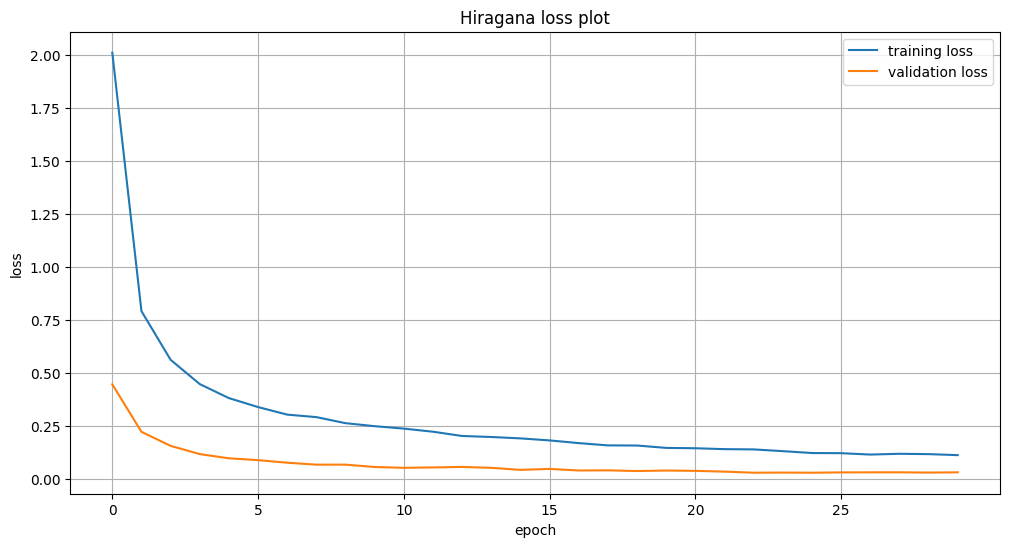

In [136]:
import matplotlib.pyplot as plt

# plot loss
fig = plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Hiragana loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
ax = fig.gca()
ax.set_xticks(np.arange(0, 30, 5))
ax.set_yticks(np.arange(0, 2.2, 0.25))
plt.grid()
plt.legend()
plt.savefig('loss_hiragana.png')
plt.show()
plt.close()

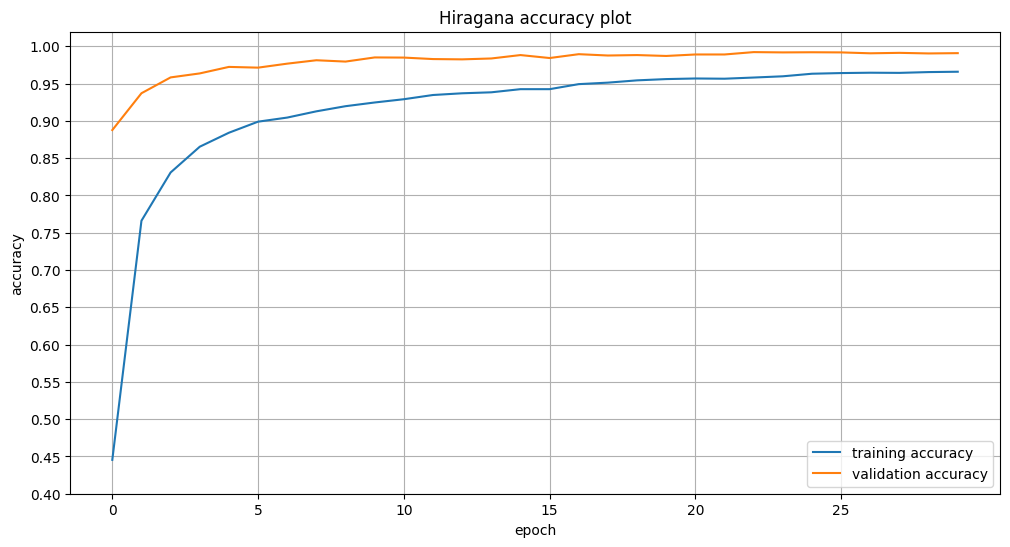

In [137]:
# plot accuracy
fig = plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Hiragana accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
ax = fig.gca()
ax.set_xticks(np.arange(0, 30, 5))
ax.set_yticks(np.arange(0.4, 1.02, 0.05))
plt.grid()
plt.savefig('accuracy_hiragana.png')
plt.show()
plt.close()